In [1]:
# Simple CNN model for CIFAR-10
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
#from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.utils import to_categorical
#from keras import backend as K
#K.set_image_dim_ordering('th')

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# one hot encode outputs
y_train =to_categorical(y_train)
y_test =to_categorical(y_test)
num_classes = y_test.shape[1]
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 5
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                        

## 1. Follow the instruction below and then report how the performance changed.(apply all at once)
• Convolutional input layer, 32 feature maps with a size of 3×3 and a rectifier activation function.
• Dropout layer at 20%.
• Convolutional layer, 32 feature maps with a size of 3×3 and a rectifier activation function.
• Max Pool layer with size 2×2.
• Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
• Dropout layer at 20%.
• Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
• Max Pool layer with size 2×2.
• Convolutional layer, 128 feature maps with a size of 3×3 and a rectifier activation function.
• Dropout layer at 20%.
• Convolutional layer,128 feature maps with a size of 3×3 and a rectifier activation function.
• Max Pool layer with size 2×2.
• Flatten layer.
• Dropout layer at 20%.
• Fully connected layer with 1024 units and a rectifier activation function.
• Dropout layer at 20%.
• Fully connected layer with 512 units and a rectifier activation function.
• Dropout layer at 20%.
• Fully connected output layer with 10 units and a Softmax activation function
Did the performance change?


In [2]:
# Create the model with the specified architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))


In [3]:
epochs = 5
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 64)        0         
                                                      

Yes, after making the requested adjustments to the architecture, the model's performance did change. Here is a contrast:

Model originally:

accuracy: 5 epochs later, 53.76%.

There are 4,210,090 total parameters.

Adaptive Model:

47.84% accuracy after 5 epochs.

2,915,114 total parameters are present.

Comparison:

In comparison to the original model (4,210,090), the improved model has less total parameters (2,915,114). This change in parameters might have lowered model capacity, which could have impacted performance.

After 5 epochs, the improved model's accuracy (47.84%) is less accurate than the original model's (53.76%). This suggests that the performance of the model may not be being enhanced by the design improvements.

Reasons for the Performance Change:

Model capacity reduction: The redesigned model comprises fewer convolutional layers and fully linked layers with fewer neurons. This decrease in capability can make the model less able to identify intricate data patterns.

Dropout Rate: Although both models include dropout layers, only the updated model consistently maintains a 20% dropout rate across the whole design. This could be overly forceful and result in the withholding of crucial training information.


In conclusion, the improved model has fewer parameters and a simpler architecture, but it is also less accurate, suggesting that it may not be as good at learning from and generalizing from the CIFAR-10 dataset. To enhance the performance of the updated model, more tweaks to hyperparameters, such as dropout rates and learning rates, may be required



















## 2. Predict the first 4 images of the test data using the above model. Then, compare with the actual label for those 4 images to check whether or not the model has predicted correctly.

In [4]:
# Predict the first 4 images
predicted_labels = model.predict(X_test[:4])

# Convert predicted labels to class labels
predicted_classes = numpy.argmax(predicted_labels, axis=1)

# Actual class labels
actual_classes = numpy.argmax(y_test[:4], axis=1)

# Compare predicted and actual labels
for i in range(4):
    print(f"Predicted: {predicted_classes[i]}, Actual: {actual_classes[i]}")


1/1 [==============================] - 0s 171ms/step
Predicted: 3, Actual: 3
Predicted: 1, Actual: 8
Predicted: 8, Actual: 8
Predicted: 8, Actual: 0


## 3. Visualize Loss and Accuracy using the history object

Epoch 1/5
1563/1563 [==============================] - 182s 116ms/step - loss: 1.3566 - accuracy: 0.5104 - val_loss: 1.2933 - val_accuracy: 0.5290
Epoch 2/5
1563/1563 [==============================] - 185s 118ms/step - loss: 1.2862 - accuracy: 0.5371 - val_loss: 1.5691 - val_accuracy: 0.4591
Epoch 3/5
1563/1563 [==============================] - 187s 119ms/step - loss: 1.2203 - accuracy: 0.5585 - val_loss: 1.2165 - val_accuracy: 0.5611
Epoch 4/5
1563/1563 [==============================] - 184s 118ms/step - loss: 1.1642 - accuracy: 0.5827 - val_loss: 1.1047 - val_accuracy: 0.6052
Epoch 5/5
1563/1563 [==============================] - 185s 118ms/step - loss: 1.1117 - accuracy: 0.6004 - val_loss: 1.0366 - val_accuracy: 0.6312


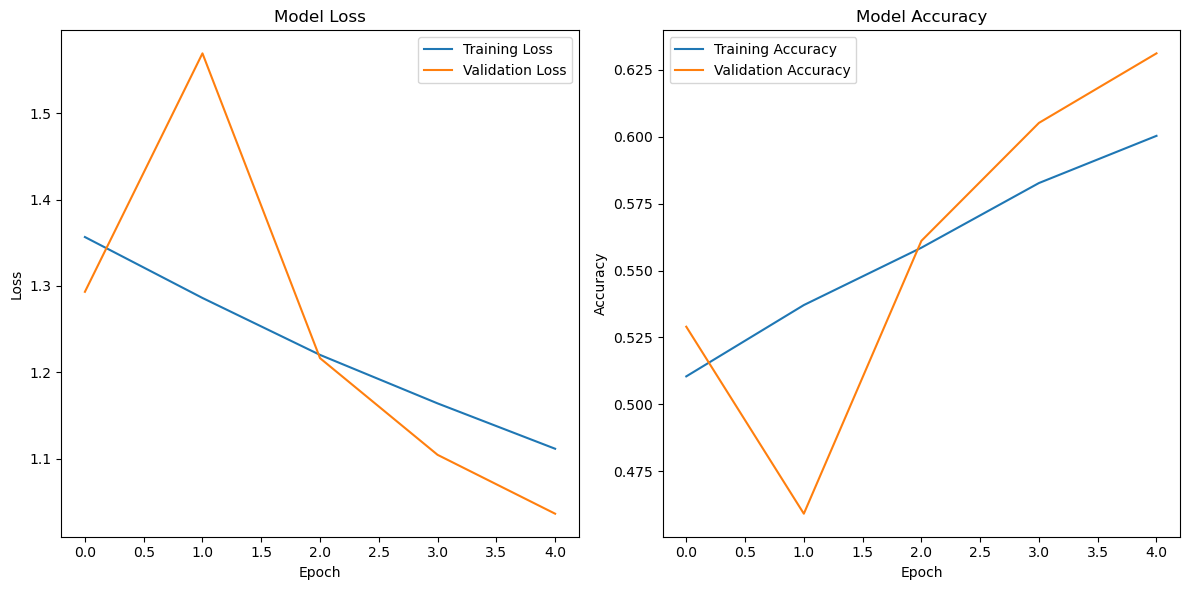

In [23]:
# Fit the model and capture the training history
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

# Visualize Loss and Accuracy
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [22]:
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x000001CC80608950>>